In [37]:
import geopandas as gpd
import matplotlib.pyplot as plt
from matplotlib.colors import to_rgba
import matplotlib.patches as mpatches
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.feature import NaturalEarthFeature

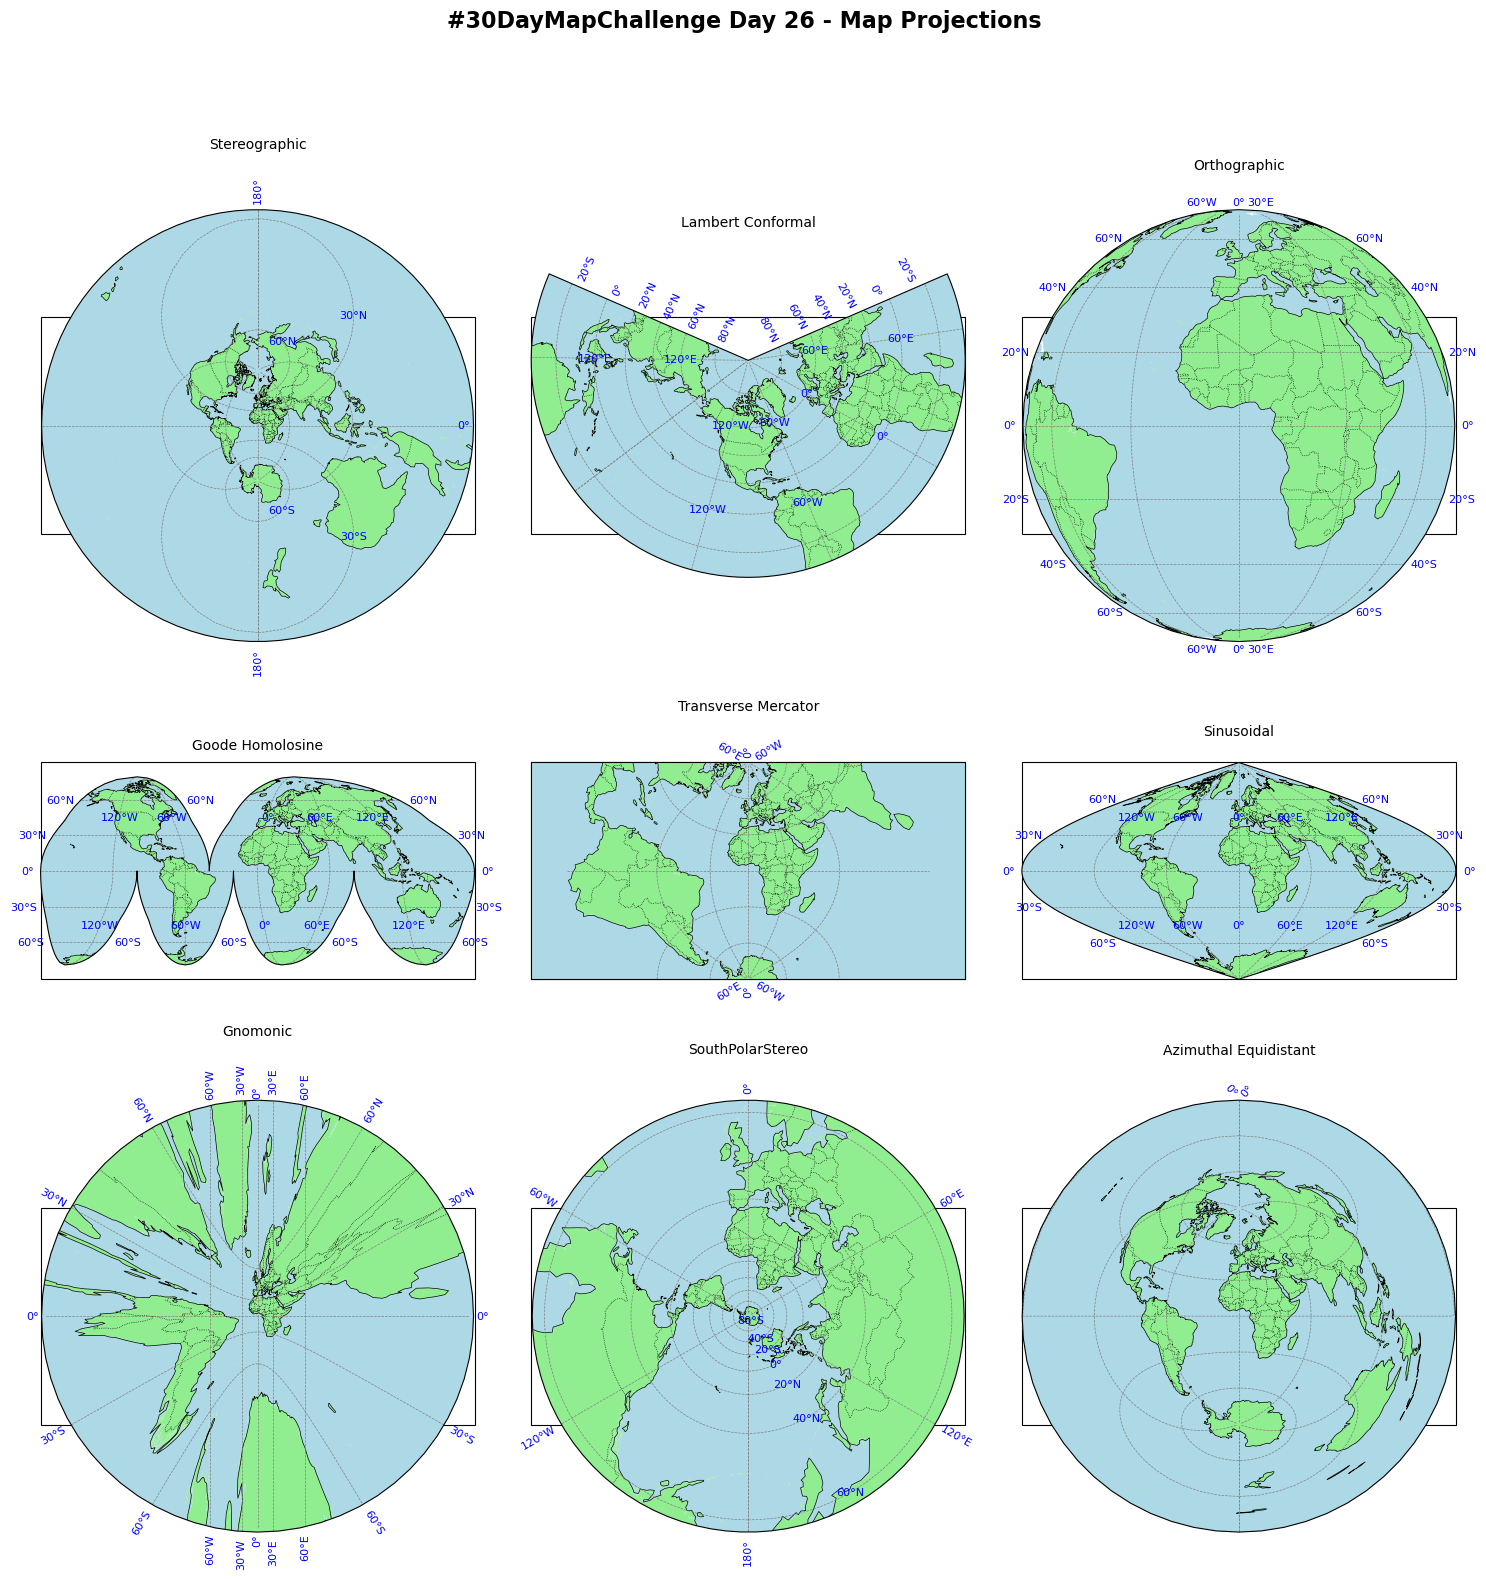

In [2]:
#list of projections to explore
#full list at https://scitools.org.uk/cartopy/docs/v0.15/crs/projections.html
projections = [
    (ccrs.Stereographic(), "Stereographic"),
    (ccrs.LambertConformal(), "Lambert Conformal"),
    (ccrs.Orthographic(), "Orthographic"),
    (ccrs.InterruptedGoodeHomolosine(), "Goode Homolosine"),
    (ccrs.TransverseMercator(), "Transverse Mercator"),
    (ccrs.Sinusoidal(), "Sinusoidal"),
    (ccrs.Gnomonic(), "Gnomonic"),
    (ccrs.SouthPolarStereo(), "SouthPolarStereo"),
    (ccrs.AzimuthalEquidistant(), "Azimuthal Equidistant"),
]

#define land and ocean features
land = cfeature.NaturalEarthFeature(
    category='physical', name='land',
    scale='50m', facecolor='lightgreen'
)
ocean = cfeature.NaturalEarthFeature(
    category='physical', name='ocean',
    scale='50m', facecolor='lightblue'
)

#plot world maps using different projections
fig, axes = plt.subplots(
    nrows=3, ncols=3, figsize=(15, 15),
    subplot_kw={'projection': ccrs.PlateCarree()}
)

for ax, (proj, name) in zip(axes.flat, projections):
    ax = plt.subplot(3, 3, projections.index((proj, name)) + 1, projection=proj)
    ax.set_title(name, fontsize=10, pad=20)

    #add land and ocean with colors
    ax.add_feature(ocean)  
    ax.add_feature(land)  
    
    #add coastlines and borders
    ax.add_feature(cfeature.COASTLINE, linewidth=0.5)
    ax.add_feature(cfeature.BORDERS, linestyle=':', linewidth=0.5)
    
    #add gridlines with adjusted labels
    gl = ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)
    gl.xlabel_style = {'size': 8, 'color': 'blue'}  
    gl.ylabel_style = {'size': 8, 'color': 'blue'}

#add an overall title
fig.suptitle('#30DayMapChallenge Day 26 - Map Projections', fontsize=16, fontweight='bold', y=1.05)

#adjust layout
plt.tight_layout()

#save the figure as an image
plt.savefig("Day 26.png", bbox_inches='tight', pad_inches=0.1)

#show the image
plt.show()

**Köppen-Geiger 1976 - 2000**

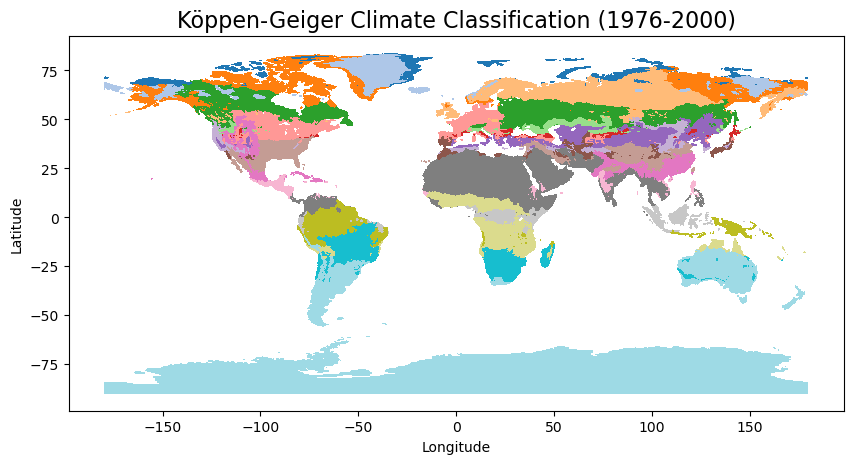

In [3]:
#load in Köppen-Geiger data
#downloaded from https://datacatalog.worldbank.org/search/dataset/0042325
gdf = gpd.read_file('c1976_2000.shp')

#plot the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, cmap='tab20', legend=True)

#add title and labels
ax.set_title("Köppen-Geiger Climate Classification (1976-2000)", fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#show the plot
plt.show()

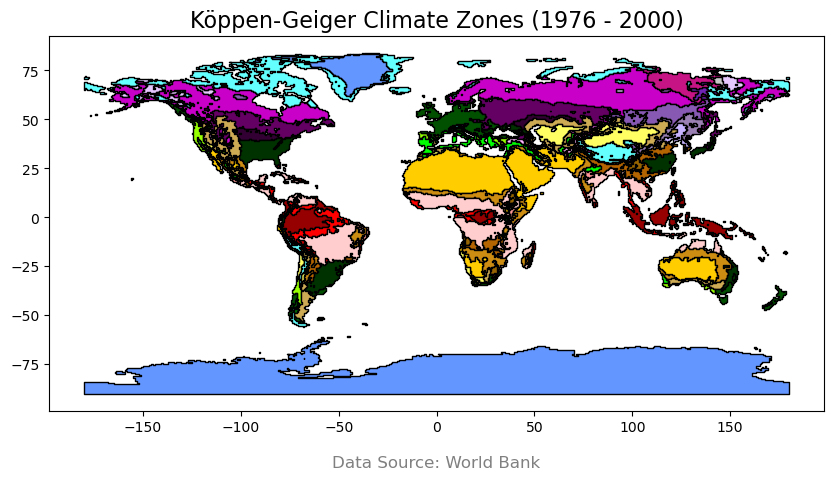

In [21]:
#prepare the mapping from GRIDCODE to Color
#https://gist.github.com/jsanz/5766a587113d092739b6#file-koppen-gridcodes-csv
color_map = {
    11: '#960000', 12: '#FF0000', 13: '#FF9999', 14: '#FFCDCD',
    21: '#FFFF64', 22: '#FFCD00', 26: '#CDAA54', 27: '#CD8D13',
    31: '#003200', 32: '#005000', 33: '#007800', 34: '#00FF00',
    35: '#96FF00', 36: '#C8FF00', 37: '#B46400', 38: '#966400',
    39: '#5A3C00', 41: '#320032', 42: '#640064', 43: '#C800C8',
    44: '#C71485', 45: '#FF6DFF', 46: '#FFB4FF', 47: '#E6C8FF',
    48: '#C8C8C8', 49: '#C8B4FF', 50: '#9A7FB3', 51: '#8859B3',
    52: '#6F24B3', 61: '#6496FF', 62: '#64FFFF'
}

#convert the color hex codes to RGBA format
color_map_rgba = {k: to_rgba(v) for k, v in color_map.items()}

#add a 'color' column based on the 'GRIDCODE' values
gdf['color'] = gdf['GRIDCODE'].map(color_map_rgba)

#plot the shapefile with the colors
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(color=gdf['color'], edgecolor='black', ax=ax)

#add a title
ax.set_title('Köppen-Geiger Climate Zones (1976 - 2000)', fontsize=16)

#add a subtitle for the data source
plt.text(0.5, -0.15, 'Data Source: World Bank', fontsize=12, color='gray', 
         transform=ax.transAxes, ha='center')

#show the plot
plt.show()

In [39]:
#köppen classification mapping
koppen_map = {
    11: 'Af', 12: 'Am', 13: 'As', 14: 'Aw',
    21: 'BWk', 22: 'BWh', 26: 'BSk', 27: 'BSh',
    31: 'Cfa', 32: 'Cfb', 33: 'Cfc', 34: 'Csa',
    35: 'Csb', 36: 'Csc', 37: 'Cwa', 38: 'Cwb',
    39: 'Cwc', 41: 'Dfa', 42: 'Dfb', 43: 'Dfc',
    44: 'Dfd', 45: 'Dsa', 46: 'Dsb', 47: 'Dsc',
    48: 'Dsd', 49: 'Dwa', 50: 'Dwb', 51: 'Dwc',
    52: 'Dwd', 61: 'EF', 62: 'ET'
}

#combine GRIDCODE to Köppen and colors for legend
legend_data = {koppen_map[code]: color for code, color in color_map.items()}

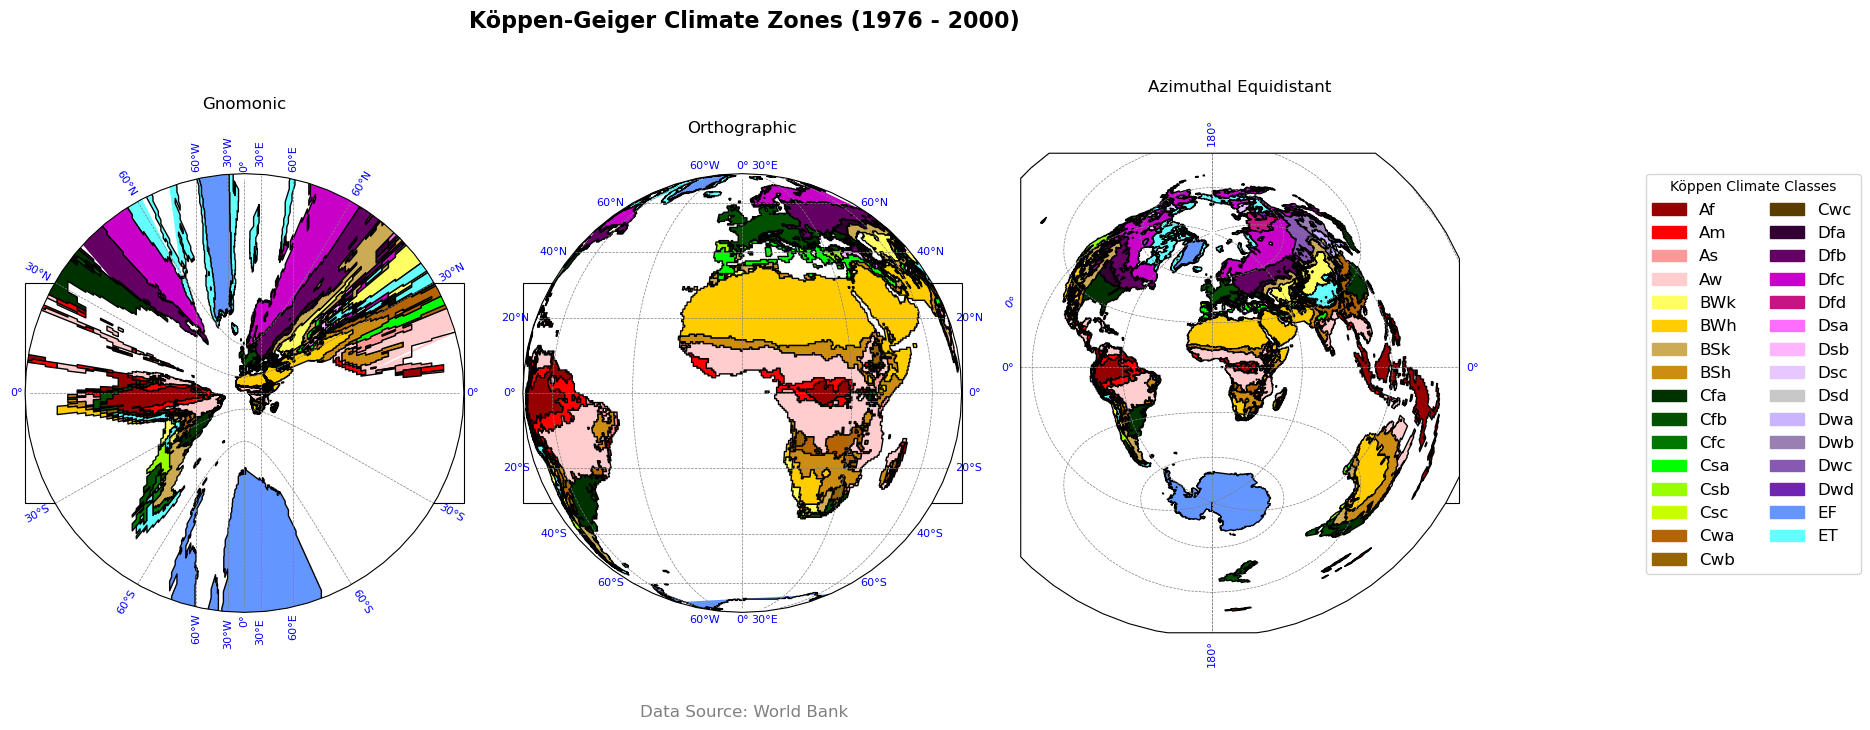

In [72]:
#list of projections to explore
projections = [
    (ccrs.Gnomonic(), "Gnomonic"),
    (ccrs.Orthographic(), "Orthographic"),
    (ccrs.AzimuthalEquidistant(), "Azimuthal Equidistant"),
]

#create the plot with a 1x3 grid of subplots
fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(15, 7),
    subplot_kw={'projection': ccrs.PlateCarree()}  #using PlateCarree for initial layout
)

#loop through each projection and plot the Köppen-Geiger data
for ax, (proj, name) in zip(axes.flat, projections):
    ax = plt.subplot(1, 3, projections.index((proj, name)) + 1, projection=proj)

    #reproject the GeoDataFrame to match the current projection
    gdf_proj = gdf.to_crs(proj.proj4_init) if hasattr(proj, 'proj4_init') else gdf

    #plot the Köppen-Geiger data
    gdf_proj.plot(ax=ax, color=gdf_proj['color'], edgecolor='black')

    #set the title for each projection
    ax.set_title(name, fontsize=12, pad=20)

    #add gridlines with adjusted labels
    gl = ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)
    gl.xlabel_style = {'size': 8, 'color': 'blue'}
    gl.ylabel_style = {'size': 8, 'color': 'blue'}

#add an overall title
fig.suptitle('Köppen-Geiger Climate Zones (1976 - 2000)', fontsize=16, fontweight='bold', y=1.02)

#adjust layout without overlapping
plt.tight_layout()

#create a custom legend with two columns
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in legend_data.items()]

#add the legend outside the plot area, using two columns
fig.legend(
    handles=legend_handles,
    loc='center right',
    title='Köppen Climate Classes',
    fontsize=12,
    title_fontsize=10,
    bbox_to_anchor=(1.25, 0.5),
    ncol=2 
)

#add data source at bottom of plot
fig.text(
    0.5, 0.01,  
    'Data Source: World Bank',  
    ha='center',  
    fontsize=12,  
    color='gray'  
)

#save the figure as an image
plt.savefig("Koppen_Geiger_Projections_1976-2000.png", bbox_inches='tight', pad_inches=0.1)

#show the plot
plt.show()

**Köppen-Geiger Projected 2076 - 2100**

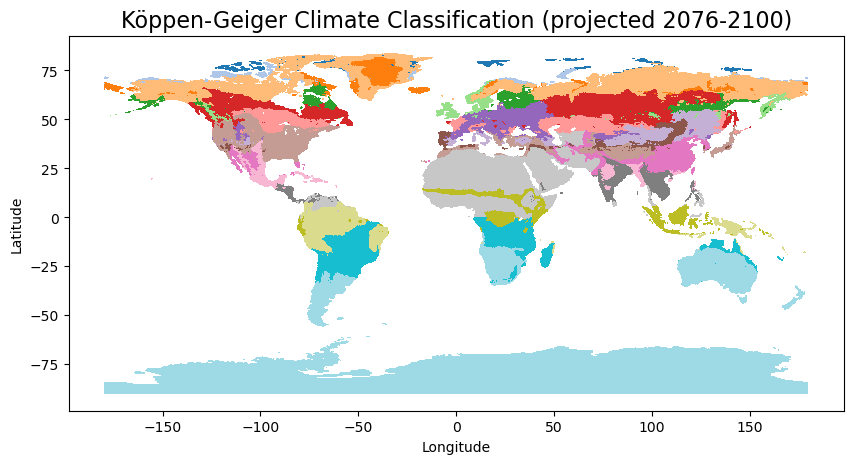

In [54]:
#load in Köppen-Geiger data
#downloaded from https://datacatalog.worldbank.org/search/dataset/0042325
gdf2 = gpd.read_file('c2076_2100_A1FI.shp')

#plot the shapefile
fig, ax = plt.subplots(figsize=(10, 10))
gdf2.plot(ax=ax, cmap='tab20', legend=True)

#add title and labels
ax.set_title("Köppen-Geiger Climate Classification (projected 2076-2100)", fontsize=16)
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')

#show the plot
plt.show()

In [62]:
gdf2.head()

,ID,GRIDCODE,geometry
0,1,61,"POLYGON ((-37 82.5, -38 82.5, -38 83, -37 83, ..."
1,2,61,"POLYGON ((-77 81.5, -79 81.5, -79 82.5, -77 82..."
2,3,43,"POLYGON ((-62.5 81, -62.5 81.5, -62 81.5, -62 ..."
3,4,62,"POLYGON ((91.5 81, 90 81, 90 81.5, 91.5 81.5, ..."
4,5,43,"POLYGON ((-89.5 80.5, -89.5 81, -89 81, -89 80..."


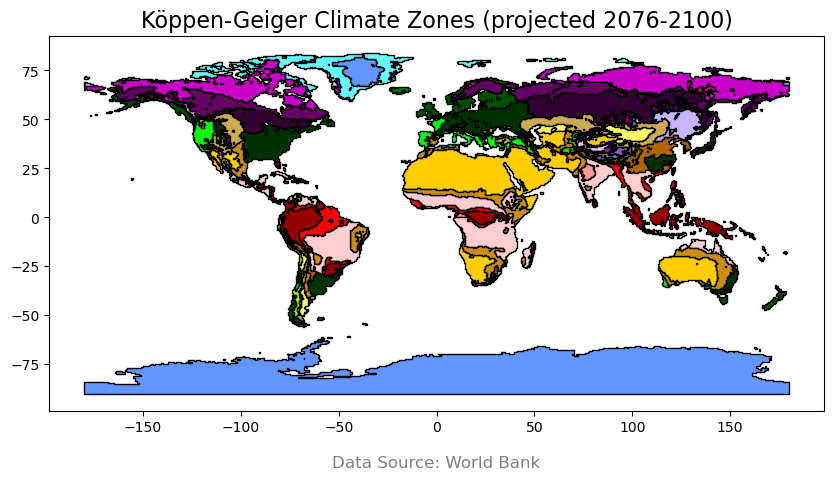

In [66]:
#prepare the mapping from GRIDCODE to Color
#https://gist.github.com/jsanz/5766a587113d092739b6#file-koppen-gridcodes-csv
color_map = {
    11: '#960000', 12: '#FF0000', 13: '#FF9999', 14: '#FFCDCD',
    21: '#FFFF64', 22: '#FFCD00', 26: '#CDAA54', 27: '#CD8D13',
    31: '#003200', 32: '#005000', 33: '#007800', 34: '#00FF00',
    35: '#96FF00', 36: '#C8FF00', 37: '#B46400', 38: '#966400',
    39: '#5A3C00', 41: '#320032', 42: '#640064', 43: '#C800C8',
    44: '#C71485', 45: '#FF6DFF', 46: '#FFB4FF', 47: '#E6C8FF',
    48: '#C8C8C8', 49: '#C8B4FF', 50: '#9A7FB3', 51: '#8859B3',
    52: '#6F24B3', 61: '#6496FF', 62: '#64FFFF'
}

#convert the color hex codes to RGBA format
color_map_rgba = {k: to_rgba(v) for k, v in color_map.items()}

#add a 'color' column based on the 'GRIDCODE' values
gdf2['color'] = gdf2['GRIDCODE'].map(color_map_rgba)

#plot the shapefile with the colors
fig, ax = plt.subplots(figsize=(10, 10))
gdf2.plot(color=gdf2['color'], edgecolor='black', ax=ax)

#add a title
ax.set_title('Köppen-Geiger Climate Zones (projected 2076-2100)', fontsize=16)

#add a subtitle for the data source
plt.text(0.5, -0.15, 'Data Source: World Bank', fontsize=12, color='gray', 
         transform=ax.transAxes, ha='center')

#show the plot
plt.show()

In [68]:
#köppen classification mapping
koppen_map = {
    11: 'Af', 12: 'Am', 13: 'As', 14: 'Aw',
    21: 'BWk', 22: 'BWh', 26: 'BSk', 27: 'BSh',
    31: 'Cfa', 32: 'Cfb', 33: 'Cfc', 34: 'Csa',
    35: 'Csb', 36: 'Csc', 37: 'Cwa', 38: 'Cwb',
    39: 'Cwc', 41: 'Dfa', 42: 'Dfb', 43: 'Dfc',
    44: 'Dfd', 45: 'Dsa', 46: 'Dsb', 47: 'Dsc',
    48: 'Dsd', 49: 'Dwa', 50: 'Dwb', 51: 'Dwc',
    52: 'Dwd', 61: 'EF', 62: 'ET'
}

#combine GRIDCODE to Köppen and colors for legend
legend_data = {koppen_map[code]: color for code, color in color_map.items()}

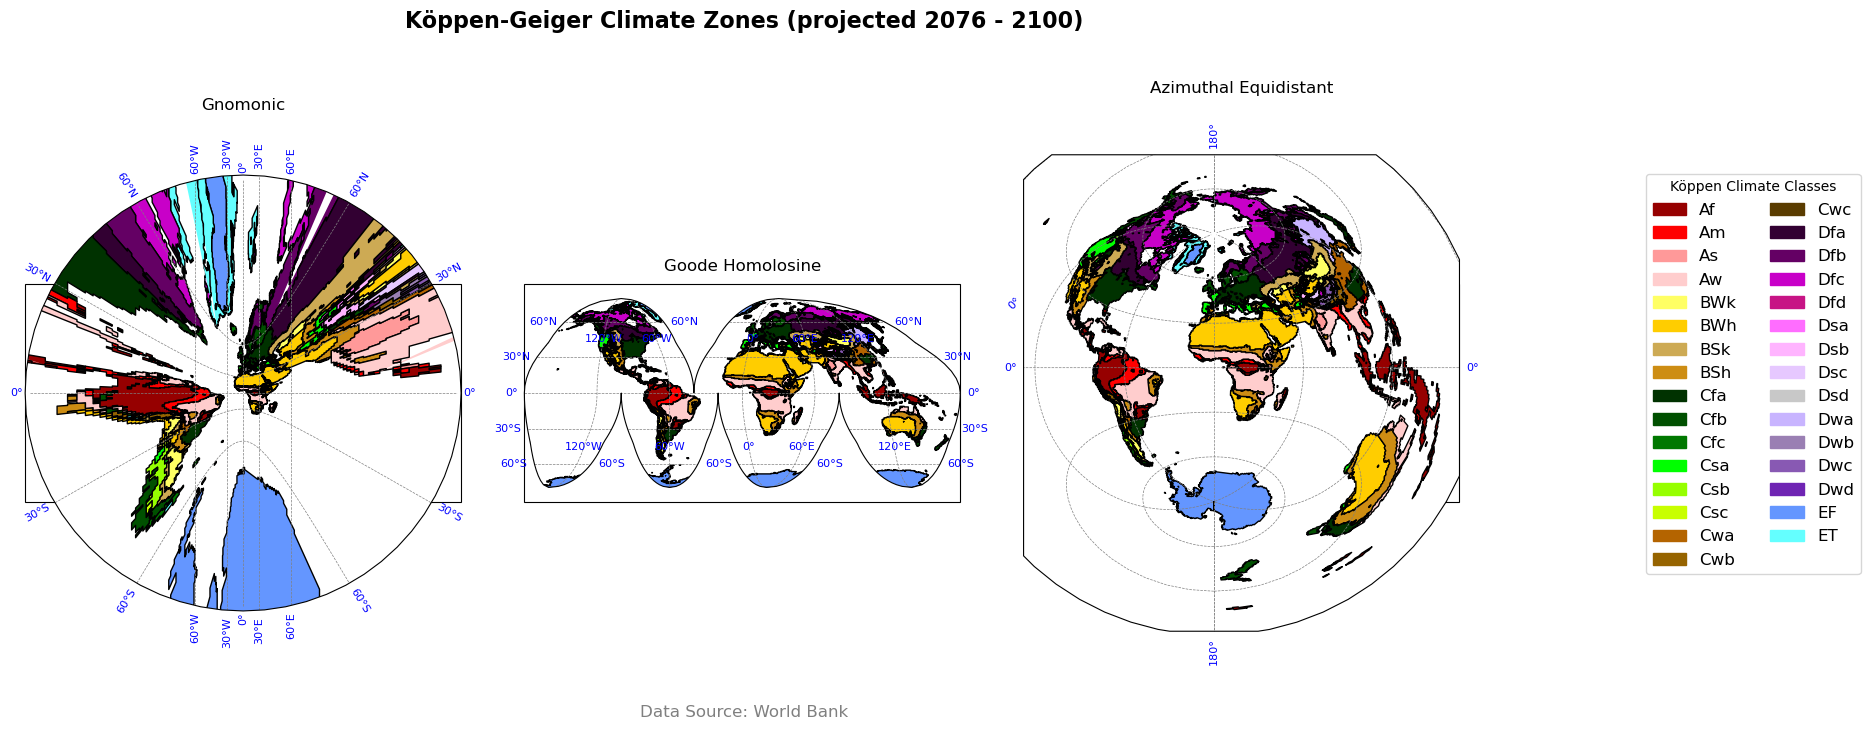

In [76]:
#list of projections to explore
projections = [
    (ccrs.Gnomonic(), "Gnomonic"),
    (ccrs.InterruptedGoodeHomolosine(), "Goode Homolosine"),
    (ccrs.AzimuthalEquidistant(), "Azimuthal Equidistant"),
]

#create the plot with a 1x3 grid of subplots
fig, axes = plt.subplots(
    nrows=1, ncols=3, figsize=(15, 7),
    subplot_kw={'projection': ccrs.PlateCarree()}  #using PlateCarree for initial layout
)

#loop through each projection and plot the Köppen-Geiger data
for ax, (proj, name) in zip(axes.flat, projections):
    ax = plt.subplot(1, 3, projections.index((proj, name)) + 1, projection=proj)

    #reproject the GeoDataFrame to match the current projection
    gdf2_proj = gdf2.to_crs(proj.proj4_init) if hasattr(proj, 'proj4_init') else gdf2

    #plot the Köppen-Geiger data
    gdf2_proj.plot(ax=ax, color=gdf2_proj['color'], edgecolor='black')

    #set the title for each projection
    ax.set_title(name, fontsize=12, pad=20)

    #add gridlines with adjusted labels
    gl = ax.gridlines(draw_labels=True, color='gray', linestyle='--', linewidth=0.5)
    gl.xlabel_style = {'size': 8, 'color': 'blue'}
    gl.ylabel_style = {'size': 8, 'color': 'blue'}

#add an overall title
fig.suptitle('Köppen-Geiger Climate Zones (projected 2076 - 2100)', fontsize=16, fontweight='bold', y=1.02)

#adjust layout without overlapping
plt.tight_layout()

#create a custom legend with two columns
legend_handles = [mpatches.Patch(color=color, label=label) for label, color in legend_data.items()]

#add the legend outside the plot area, using two columns
fig.legend(
    handles=legend_handles,
    loc='center right',
    title='Köppen Climate Classes',
    fontsize=12,
    title_fontsize=10,
    bbox_to_anchor=(1.25, 0.5),
    ncol=2 
)

#add data source at bottom of plot
fig.text(
    0.5, 0.01,  
    'Data Source: World Bank',  
    ha='center',  
    fontsize=12,  
    color='gray'  
)

#save the figure as an image
plt.savefig("Koppen_Geiger_Projections_projected_2076-2100.png", bbox_inches='tight', pad_inches=0.1)

#show the plot
plt.show()